In [1]:
import os
from collections.abc import Iterable
from datetime import datetime

import git
import networkx as nx

os.getcwd()

'/Users/timottinger/Projects/gitminer-jupyter/Notebooks'

In [2]:


def commits_in_period(repo_to_search: git.Repo, beginning: datetime, ending: datetime) -> Iterable[git.Commit]:
    for commit in repo_to_search.iter_commits():
        if beginning <= commit.committed_datetime <= ending:
            yield commit



In [3]:
repo = git.Repo("../../siemens-wfx")
start_date = datetime(month=8, day=1, year=2024).astimezone()  #until_today - timedelta(days=90)
end_date = datetime(month=8, day=19, year=2024).astimezone()  #datetime.today().astimezone()


# Collect the child/parent edges
The idea is that each independent (unmerged) thread will not connect to any other 
threads. Since they are distinct, they will show up as being in different connected
groups than the other threads.

In [4]:
commit: git.Commit
graph = nx.Graph()
for commit in commits_in_period(repo, start_date, end_date):
    # Skip the merges, because they connect everything
    if len(commit.parents) > 1:
        continue
    for parent in commit.parents:
        print(commit.hexsha, parent.hexsha)
        graph.add_edge(commit.hexsha, parent.hexsha)

1e333824197a9b3590f651eef9ba89bb0cc4aebd 3610638d2585c74137ef843caca253fa168fc09a
3610638d2585c74137ef843caca253fa168fc09a 3e5aa42fc7cb91ee918d12be4e3d02cd03754916
3e5aa42fc7cb91ee918d12be4e3d02cd03754916 0b3b4c13f3aa27ddf587623346b7e365a38bb75f
0b3b4c13f3aa27ddf587623346b7e365a38bb75f 4092c2739bbdf595565fa56f462e09ee51d296b4
4092c2739bbdf595565fa56f462e09ee51d296b4 47d4728f1b9331cb2ba5ccdcc5108149a56aeab4
47d4728f1b9331cb2ba5ccdcc5108149a56aeab4 7de91a226da545df46821ad7fad4455b103fce20
7de91a226da545df46821ad7fad4455b103fce20 b1ffedc69d8fa1a03d9f6c71e0f3f7cacdb74b1d


In [5]:
connected = list(nx.connected_components(graph))
f"We identify {len(connected)} lines of work from {start_date.date()} through {end_date.date()}"


'We identify 1 lines of work from 2024-08-01 through 2024-08-19'

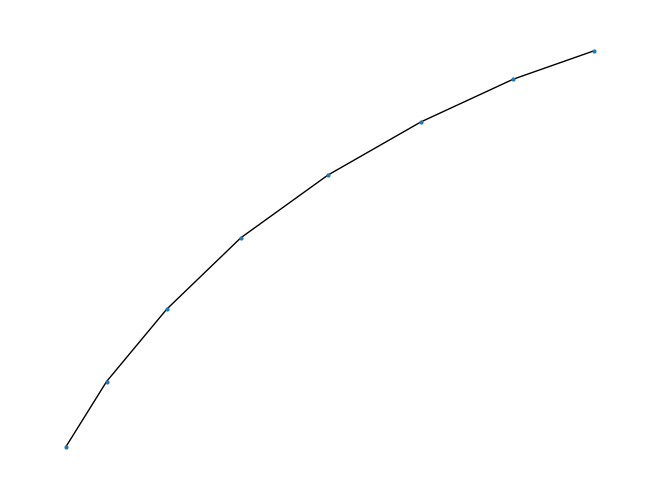

In [6]:
nx.draw(graph, with_labels=False, node_size=4)

In [7]:
with_merges = nx.Graph()
for commit in commits_in_period(repo, start_date, end_date):
    for parent in commit.parents:
        graph.add_edge(commit.hexsha, parent.hexsha)

still_unmerged = list(nx.connected_components(graph))
print(f"There seems to be {len(still_unmerged)} surviving line of work")

There seems to be 1 surviving line of work
